In [1]:
import os
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

os.chdir(r'C:\Users\tdrown\Desktop\Data Center Blog Post\Energy Cost Data')

In [2]:
us_elec_file = r"C:\Users\tdrown\Desktop\Data Center Blog Post\Energy Cost Data\Average_retail_price_of_electricity_United_States_monthly.csv"
us_elec_head = ['month', 'commercial', 'industrial']

In [3]:
us_elec = pd.read_csv(us_elec_file, skiprows=5, names = us_elec_head)

In [4]:
print(us_elec.columns)
us_elec.head(5)

Index(['month', 'commercial', 'industrial'], dtype='object')


,month,commercial,industrial
0,Dec 2022,12.42,8.63
1,Nov 2022,12.50,8.31
2,Oct 2022,13.05,8.61
3,Sep 2022,13.45,9.22
4,Aug 2022,13.53,9.51


In [5]:
#Cleaning
us_elec['month'] = pd.to_datetime(us_elec['month'])
#Convert Cents per KwH to $
for ii in ['commercial', 'industrial']:
    us_elec[ii] = us_elec[ii]/100

#Index as Datetime
us_elec = us_elec.sort_values(by='month')
us_elec.set_index('month', inplace=True)

In [6]:
us_elec.commercial

month
2001-01-01    0.0725
2001-02-01    0.0751
2001-03-01    0.0770
2001-04-01    0.0773
2001-05-01    0.0777
2001-06-01    0.0813
2001-07-01    0.0841
2001-08-01    0.0835
2001-09-01    0.0822
2001-10-01    0.0827
2001-11-01    0.0773
2001-12-01    0.0766
2002-01-01    0.0749
2002-02-01    0.0768
2002-03-01    0.0772
2002-04-01    0.0768
2002-05-01    0.0784
2002-06-01    0.0818
2002-07-01    0.0833
2002-08-01    0.0824
2002-09-01    0.0800
2002-10-01    0.0800
2002-11-01    0.0764
2002-12-01    0.0759
2003-01-01    0.0745
2003-02-01    0.0765
2003-03-01    0.0778
2003-04-01    0.0793
2003-05-01    0.0806
2003-06-01    0.0844
2003-07-01    0.0855
2003-08-01    0.0846
2003-09-01    0.0815
2003-10-01    0.0809
2003-11-01    0.0785
2003-12-01    0.0770
2004-01-01    0.0770
2004-02-01    0.0785
2004-03-01    0.0792
2004-04-01    0.0789
2004-05-01    0.0799
2004-06-01    0.0849
2004-07-01    0.0863
2004-08-01    0.0870
2004-09-01    0.0854
2004-10-01    0.0823
2004-11-01    0.0804
2004-12

<AxesSubplot:xlabel='month'>

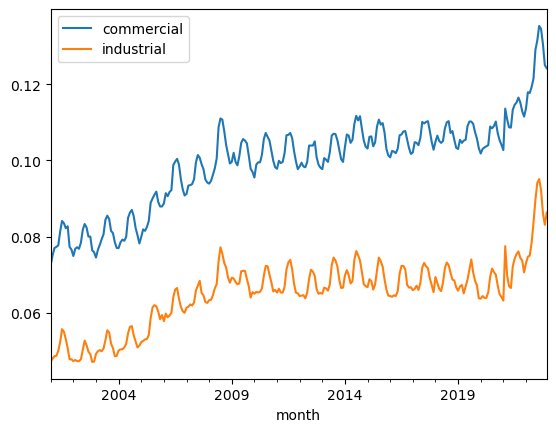

In [7]:
us_elec.plot()

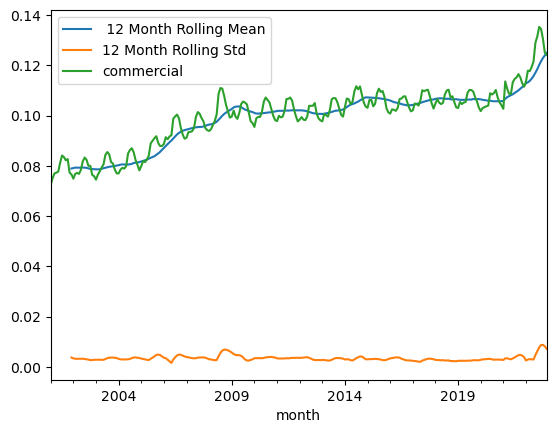

In [8]:
timeseries = us_elec['commercial']
timeseries.rolling(12).mean().plot(label = ' 12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

<Figure size 640x480 with 0 Axes>

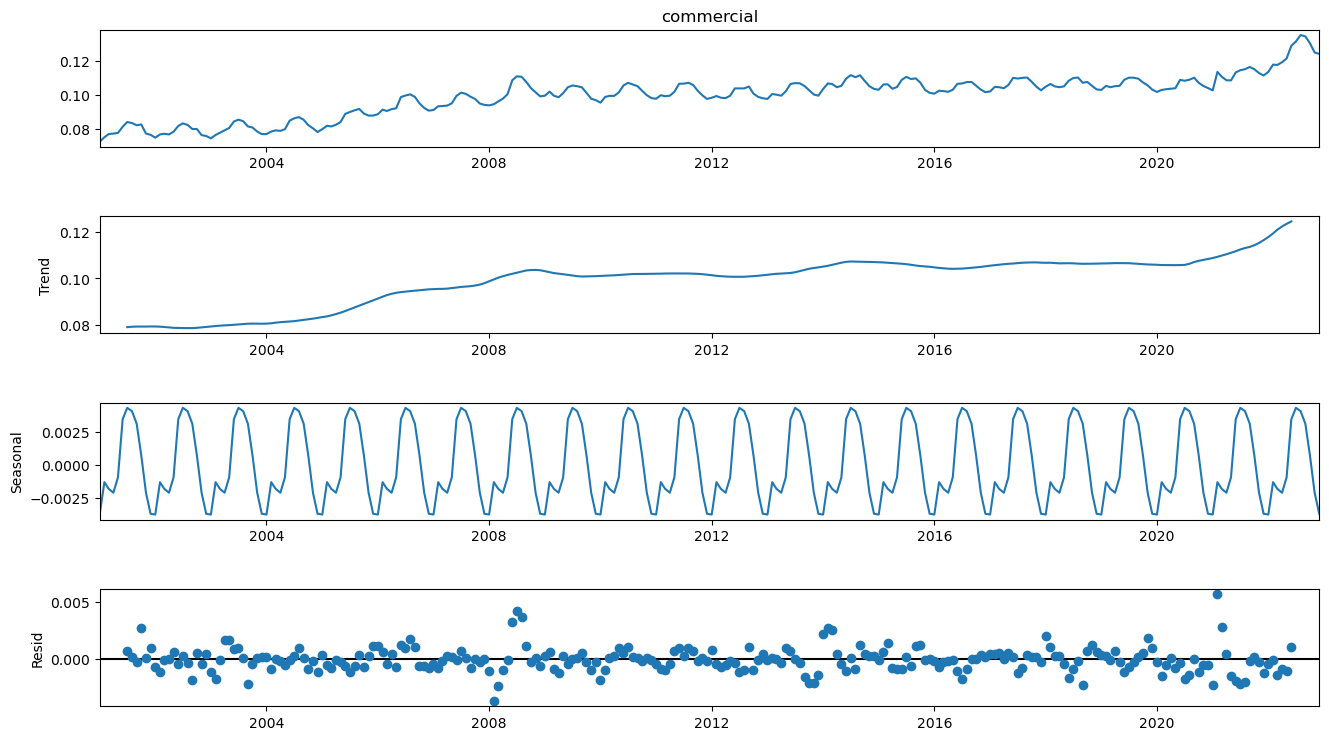

In [9]:
#Seasonality Trend - Quarter
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(us_elec['commercial'])
figure = plt.figure()
figure = decomposition.plot()
figure.set_size_inches(15, 8)

In [10]:
#Creating this for later, save to 'Test-Setup'
def check_adf(time_series):
    test_result = adfuller(us_elec['commercial'])
    print('ADF Test:')
    labels = ['ADF Statistic', 'p-value', 'No. of Lags Used', 'Number of Obs']

    for value,label in zip(test_result,labels):
        print (label+r':'+str(value))
    if test_result[1] <= 0.05:
        print ("Reject null hypothesis and data is stationary")
    else:
        print ("Fail to reject H0 thereby data is non-stationary")


In [11]:
check_adf(us_elec['commercial'])

ADF Test:
ADF Statistic:-0.019300504787548023
p-value:0.9569065444467926
No. of Lags Used:12
Number of Obs:251
Fail to reject H0 thereby data is non-stationary


ADF Test:
ADF Statistic:-0.019300504787548023
p-value:0.9569065444467926
No. of Lags Used:12
Number of Obs:251
Fail to reject H0 thereby data is non-stationary
ADF Test:
ADF Statistic:-0.019300504787548023
p-value:0.9569065444467926
No. of Lags Used:12
Number of Obs:251
Fail to reject H0 thereby data is non-stationary
ADF Test:
ADF Statistic:-0.019300504787548023
p-value:0.9569065444467926
No. of Lags Used:12
Number of Obs:251
Fail to reject H0 thereby data is non-stationary
ADF Test:
ADF Statistic:-0.019300504787548023
p-value:0.9569065444467926
No. of Lags Used:12
Number of Obs:251
Fail to reject H0 thereby data is non-stationary
ADF Test:
ADF Statistic:-0.019300504787548023
p-value:0.9569065444467926
No. of Lags Used:12
Number of Obs:251
Fail to reject H0 thereby data is non-stationary


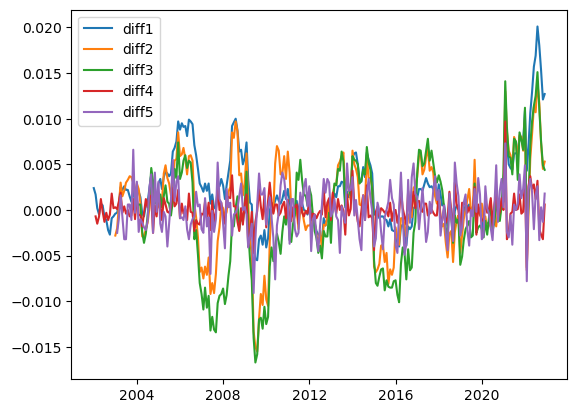

In [12]:
#Differencing to detrend
#No version of first or second differencing either through t-1 nor t-m allowed for stationality.
#Clear Seasonal Trend as well as possible linear/quadratic trend

us_elec['diff1'] = (us_elec['commercial'] - us_elec['commercial'].shift(12))
us_elec['diff2'] = (us_elec['commercial'] - us_elec['commercial'].shift(12)) - (us_elec['commercial'].shift(12) - us_elec['commercial'].shift(24))
us_elec['diff3'] = (us_elec['commercial'] - us_elec['commercial'].shift(12)) - (us_elec['commercial'].shift(12) - us_elec['commercial'].shift(24)) - (us_elec['commercial'].shift(24) - us_elec['commercial'].shift(36))
us_elec['diff4'] = (us_elec['commercial'] - us_elec['commercial'].shift(1)) - (us_elec['commercial'].shift(12) - us_elec['commercial'].shift(13))
us_elec['diff5'] = (us_elec['commercial'] - us_elec['commercial'].shift(1)) - (us_elec['commercial'].shift(12) - us_elec['commercial'].shift(13)) - (us_elec['commercial'].shift(24) - us_elec['commercial'].shift(25))

for d in [us_elec['diff1'], us_elec['diff2'], us_elec['diff3'], us_elec['diff4'], us_elec['diff5']]:
    check_adf(d.dropna())

plt.plot(us_elec['diff1'])
plt.plot(us_elec['diff2'])
plt.plot(us_elec['diff3'])
plt.plot(us_elec['diff4'])
plt.plot(us_elec['diff5'])
plt.legend(['diff1', 'diff2', 'diff3', 'diff4', 'diff5'])
plt.show()

In [13]:
#Trying removing linear trend
x = [i for i in range(1, len(us_elec)+1)]
x = np.reshape(x, (len(x), 1))
y = us_elec['commercial'].values
model = LinearRegression()
model.fit(x, y)
trend = model.predict(x)

#model seems to have a quadratic trend of degree 3
pf = PolynomialFeatures(degree=3)
xp = pf.fit_transform(x)
model2 = LinearRegression()
model2.fit(xp, y)
trendp = model2.predict(xp)

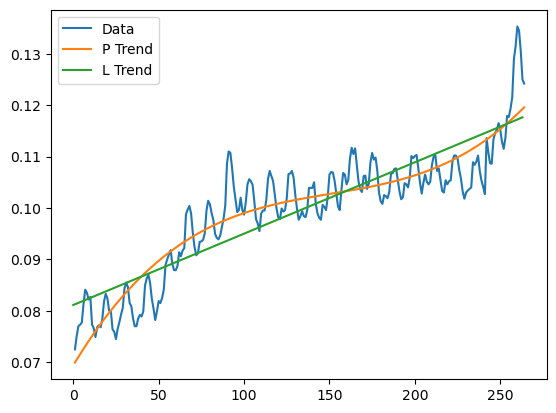

In [14]:
plt.plot(x, y)
plt.plot(x, trendp)
plt.plot(trend)
plt.legend(['Data', 'P Trend', 'L Trend'])
plt.show()

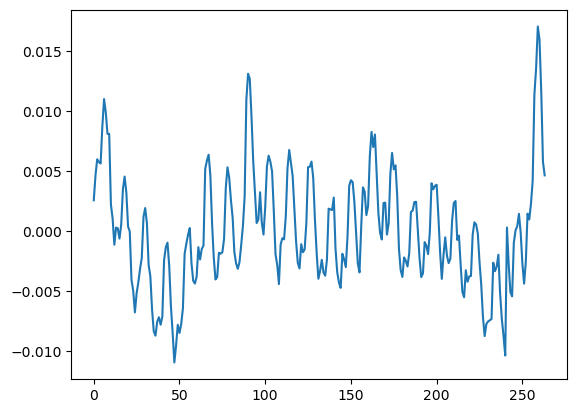

In [15]:
detrended = [y[i] - trend[i] for i in range(0, len(us_elec))]
detrendedp = [y[i] - trendp[i] for i in range(0, len(us_elec))]
plt.plot(detrendedp)
plt.show()

In [16]:
check_adf(detrendedp)

ADF Test:
ADF Statistic:-0.019300504787548023
p-value:0.9569065444467926
No. of Lags Used:12
Number of Obs:251
Fail to reject H0 thereby data is non-stationary


In [17]:
order = (0,3,2)
sorder = (1,3,1,12)

model = SARIMAX(us_elec['commercial'], order=order, seasonal_order=sorder)
ARIMAresult = model.fit()
print(ARIMAresult.summary())

us_elec['forecast'] = ARIMAresult.predict(start='2022-01-01', end = '2022-12-01', dynamic=True)
us_elec[['commercial', 'forecast']].plot()

#Validation
train = us_elec['commercial'].loc[us_elec.index < '2021-01-01'].copy()
test = us_elec['commercial'].loc[us_elec.index >= '2021-01-01'].copy()

sarima = SARIMAX(train, order=order, seasonal_order=sorder)
sarima = sarima.fit()
y_pred = sarima.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05)
y_pred_df['prediction'] = sarima.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
rsme = np.sqrt(mean_squared_error(test.values, y_pred_df['prediction']))
print("RSME: ", rsme)



NameError: name 'SARIMAX' is not defined

In [ ]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from pandas import read_csv

# one-step sarima forecast
def sarima_forecast(history, config):
    order, sorder, trend = config
    # define model
    model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
    # fit model
    model_fit = model.fit(disp=False)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    history = [x for x in train]
    for i in range(len(test)):
        yhat = sarima_forecast(history, cfg)
        predictions.append(yhat)
        history.append(test[i])
    error = measure_rmse(test, predictions)
    return error

def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

def score_model(data, n_test, cgf, debug=False):
    result = None
    key = str(cfg)
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        try:
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)

def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
    scores = [r for r in scores if r[1] != None]
    scores.sort(key=lambda tup: tup[1])
    return scores

def sarima_configs(seasonal=[0]):
    models = list()
    p_params = [0,1,2]
    d_params = [0,1,2,3]
    q_params = [0,1,2]
    t_params = ['n', 'c', 't', 'ct']
    P_params = [1,2,3]
    D_params = [0, 1, 2, 3]
    Q_params = [0,1,2]
    m_params = seasonal
    
    for p in p_params:
        for d in d_params:
            for q in q_params:
                for t in t_params:
                    for P in P_params:
                        for D in D_params:
                            for Q in Q_params:
                                for m in m_params:
                                    cfg = [(p,d,q), (P,D,Q,m), t]
                                    models.append(cfg)
    return models

data = us_elec['commercial'].values
n_test = 24
cfg_list = sarima_configs(seasonal=[0,6,12])
scores = grid_search(data, cfg_list, n_test)
print('done')
for cfg, error in scores[:3]:
    print(cfg, error)
